In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#feature Selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import RFECV, RFE

from sklearn.feature_selection import SelectFromModel
from xgboost import plot_importance

#oversampling
#pip install imblearn
from imblearn.over_sampling import BorderlineSMOTE, SMOTE


from sklearn import metrics

#Classifiers

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

#FineTuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn import tree

In [2]:
with_infertility="data/PCOS_infertility.csv"
without_infertility="data/PCOS_data_without_infertility.xlsx"

PCOS_woinf = pd.read_excel(without_infertility, sheet_name=1)
PCOS_inf = pd.read_csv(with_infertility)

In [3]:
PCOS_inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [4]:
PCOS_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


# Data Preprocessing

In [5]:
df = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

C:\Users\PC\AppData\Local\Temp\ipykernel_7084\1308940508.py:1: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')


In [6]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_y,PCOS (Y/N)_y,I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y,AMH(ng/mL)_y
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,3,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,5,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,15,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,2,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,4,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df =df.drop(['Unnamed: 44', 'Sl. No_y', 'Sl. No', 'Patient File No.',  'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

In [8]:
df.duplicated().sum()

0

In [9]:
#Converting object data type to numeric type

df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce")
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce") #converting object datatype to numeric

**Handling Missing Values**

In [10]:
plt.rc('xtick', labelsize=6) 
plt.rc('ytick', labelsize=6) 
plt.rc('font', size=6)
plt.rcParams["axes.linewidth"] = 0.5

In [11]:
df.isna().any()

PCOS (Y/N)                False
 Age (yrs)                False
Weight (Kg)               False
Height(Cm)                False
BMI                       False
Blood Group               False
Pulse rate(bpm)           False
RR (breaths/min)          False
Hb(g/dl)                  False
Cycle(R/I)                False
Cycle length(days)        False
Marraige Status (Yrs)      True
Pregnant(Y/N)             False
No. of aborptions         False
  I   beta-HCG(mIU/mL)    False
II    beta-HCG(mIU/mL)     True
FSH(mIU/mL)               False
LH(mIU/mL)                False
FSH/LH                    False
Hip(inch)                 False
Waist(inch)               False
Waist:Hip Ratio           False
TSH (mIU/L)               False
AMH(ng/mL)                 True
PRL(ng/mL)                False
Vit D3 (ng/mL)            False
PRG(ng/mL)                False
RBS(mg/dl)                False
Weight gain(Y/N)          False
hair growth(Y/N)          False
Skin darkening (Y/N)      False
Hair los

In [12]:
df.isna().sum().sum()

4

In [13]:
#column names with missing data
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

['Marraige Status (Yrs)',
 'II    beta-HCG(mIU/mL)',
 'AMH(ng/mL)',
 'Fast food (Y/N)']

<AxesSubplot:>

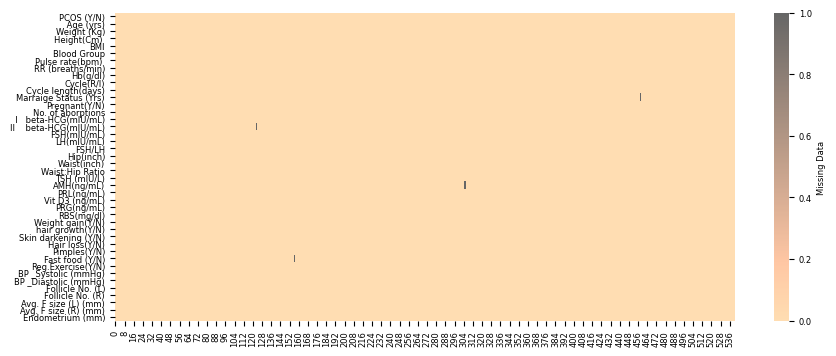

In [14]:
#plotting heatmap to visualize missing values
plt.figure(figsize=(10,4))
sns.heatmap(df.isna().transpose(),cmap="copper_r", alpha=0.6,
            cbar_kws={'label': 'Missing Data'}, yticklabels=True)

In [15]:
#df['Marraige Status (Yrs)'].fillna(value = df['Marraige Status (Yrs)'].mode()[0], inplace=True)
#df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0], inplace=True)

In [16]:
#filling missing values with their median
for x in lst_missing_columns:
    df[x] = df[x].fillna(df[x].median()) #filling columns with missing value with their mode

In [17]:
df.isna().sum().sum()

0

In [18]:
#column names with missing data
lst_missing_columns = df.columns[df.isna().any()].tolist()
lst_missing_columns

[]

In [19]:
df.isna().any()

PCOS (Y/N)                False
 Age (yrs)                False
Weight (Kg)               False
Height(Cm)                False
BMI                       False
Blood Group               False
Pulse rate(bpm)           False
RR (breaths/min)          False
Hb(g/dl)                  False
Cycle(R/I)                False
Cycle length(days)        False
Marraige Status (Yrs)     False
Pregnant(Y/N)             False
No. of aborptions         False
  I   beta-HCG(mIU/mL)    False
II    beta-HCG(mIU/mL)    False
FSH(mIU/mL)               False
LH(mIU/mL)                False
FSH/LH                    False
Hip(inch)                 False
Waist(inch)               False
Waist:Hip Ratio           False
TSH (mIU/L)               False
AMH(ng/mL)                False
PRL(ng/mL)                False
Vit D3 (ng/mL)            False
PRG(ng/mL)                False
RBS(mg/dl)                False
Weight gain(Y/N)          False
hair growth(Y/N)          False
Skin darkening (Y/N)      False
Hair los

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   541 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PCOS (Y/N),541.0,0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.000000
Age (yrs),541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
Weight (Kg),541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
Height(Cm),541.0,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
BMI,541.0,24.319353,4.050819,12.417882,21.707923,24.238227,26.638918,38.900714
Blood Group,541.0,13.802218,1.840812,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse rate(bpm),541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
RR (breaths/min),541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000
Hb(g/dl),541.0,11.160037,0.866904,8.500000,10.500000,11.000000,11.700000,14.800000
Cycle(R/I),541.0,2.560074,0.901950,2.000000,2.000000,2.000000,4.000000,5.000000


In [22]:
df.columns = [col.strip() for col in df.columns]

# Exploratory Data Analysis

**Visualization**

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='count'>

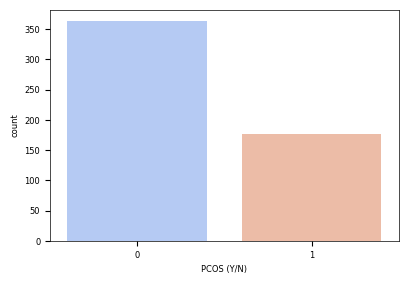

In [23]:
plt.figure(figsize=(4.5,3))
sns.countplot(x="PCOS (Y/N)",  palette="coolwarm",data = df)

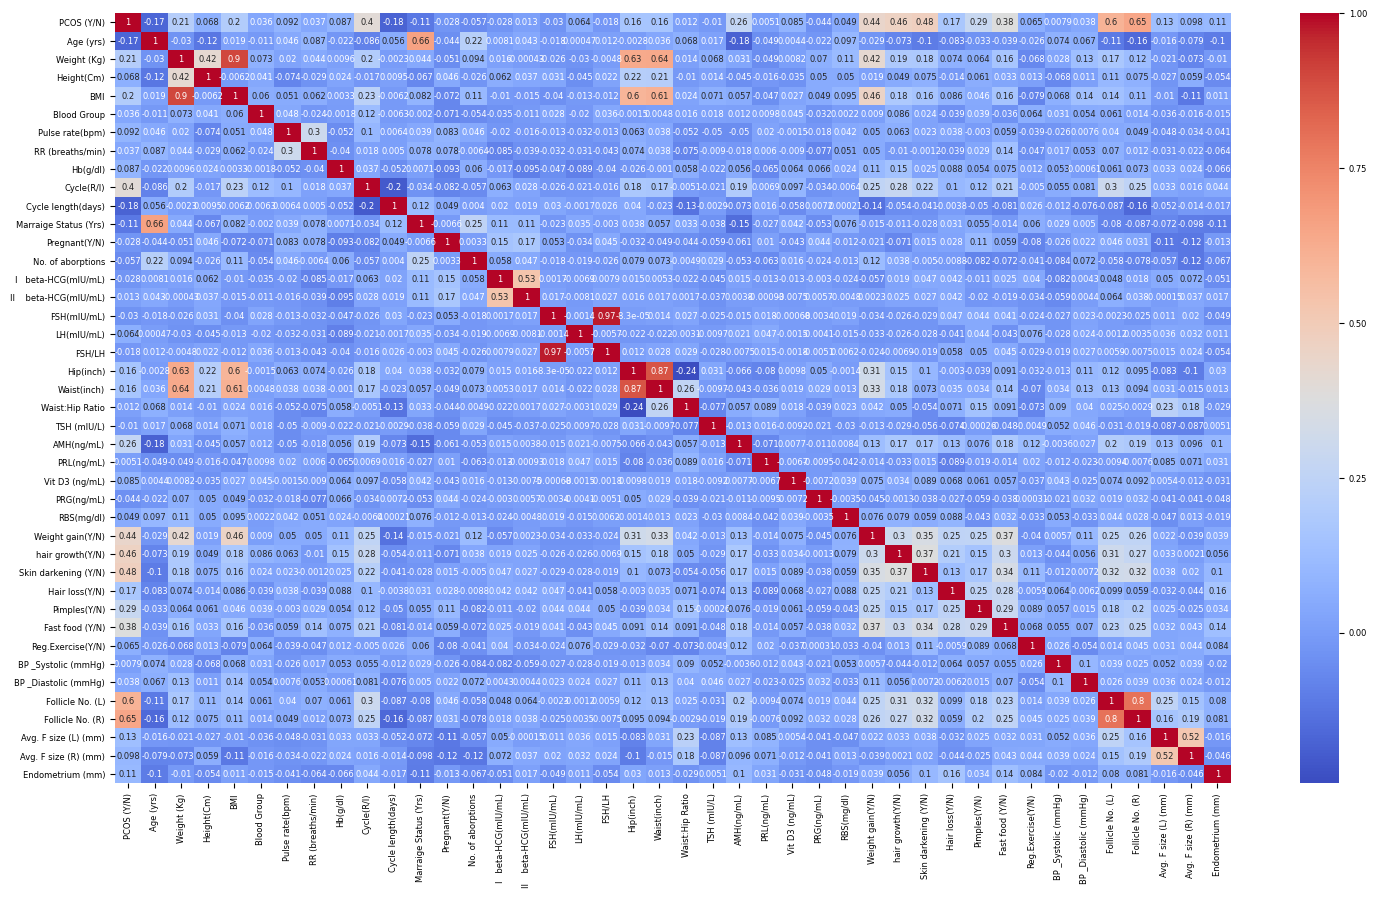

In [24]:
#Plotting correlation heatmap

plt.figure(figsize=(18, 10))

dataplot = sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
  
# displaying heatmap
plt.show()

In [25]:
#Checking how different features are correlated to PCOS
df.corr()["PCOS (Y/N)"].sort_values(ascending=False) #sorting in descending order

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.200177
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

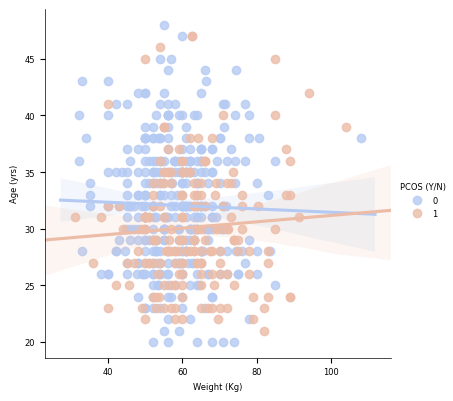

In [26]:
# pattern of Weight over Age in PCOS and normal

sns.lmplot(data = df, x='Weight (Kg)',y='Age (yrs)', hue = "PCOS (Y/N)", palette=["#B5CAF3", "#ECBCA7"], height=4, aspect=1)
plt.show()

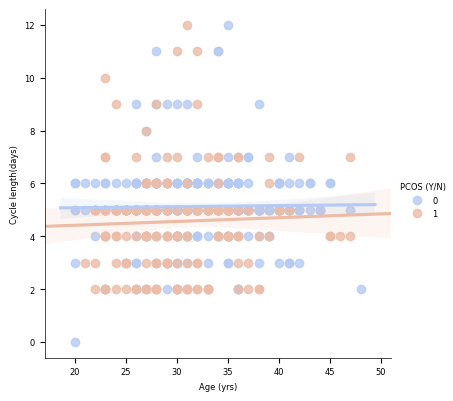

In [27]:
# Length of menstrual phase in PCOS vs normal 

sns.lmplot(data = df,x = "Age (yrs)",y = "Cycle length(days)", hue = "PCOS (Y/N)", palette=["#B5CAF3", "#ECBCA7"], height=4, aspect=1)
plt.show()

<AxesSubplot:xlabel='Pulse rate(bpm)', ylabel='BMI'>

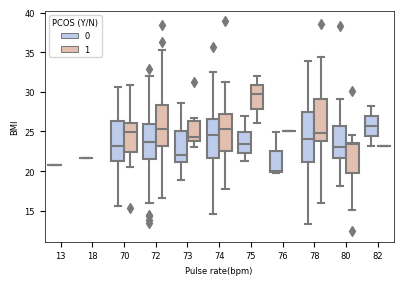

In [28]:
plt.figure(figsize=(4.5, 3))

sns.boxplot(x='Pulse rate(bpm)',y='BMI', palette=["#B5CAF3", "#ECBCA7"], data=df, hue='PCOS (Y/N)')

<AxesSubplot:xlabel='Pulse rate(bpm)', ylabel='Age (yrs)'>

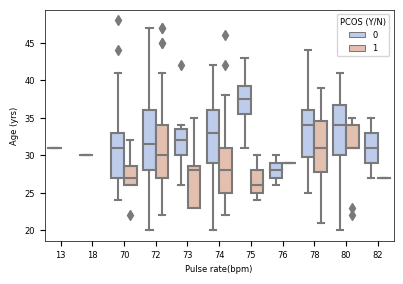

In [29]:
plt.figure(figsize=(4.5, 3))

sns.boxplot(x='Pulse rate(bpm)',y='Age (yrs)', palette=["#B5CAF3", "#ECBCA7"], data=df, hue='PCOS (Y/N)')

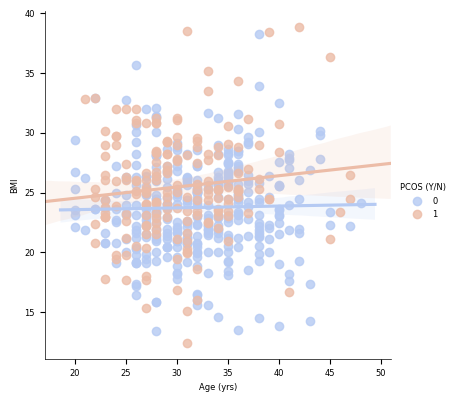

In [30]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 

sns.lmplot(data = df,x = "Age (yrs)",y = "BMI", hue = "PCOS (Y/N)", palette=["#B5CAF3", "#ECBCA7"], height=4, aspect=1)
plt.show()

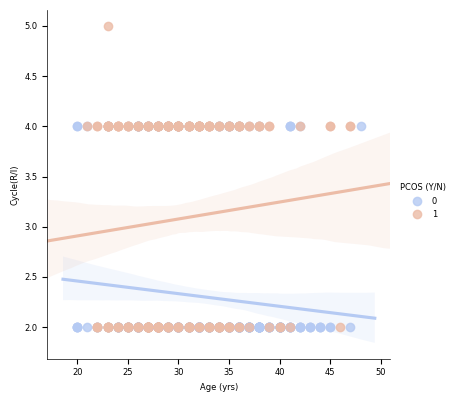

In [31]:
# cycle IR wrt age  

sns.lmplot(data = df,x = "Age (yrs)",y = "Cycle(R/I)", hue = "PCOS (Y/N)", palette=["#B5CAF3", "#ECBCA7"], height=4, aspect=1)
plt.show()

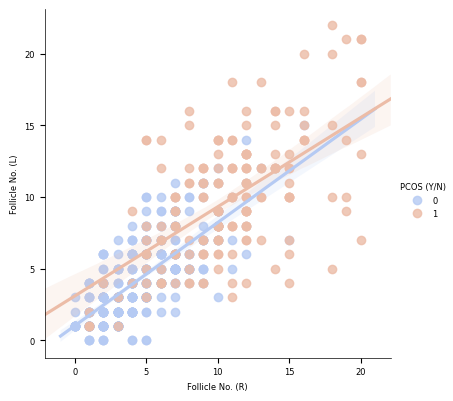

In [32]:
# Distribution of follicles in both ovaries.

sns.lmplot(data = df, x='Follicle No. (R)',y='Follicle No. (L)', hue = "PCOS (Y/N)", palette=["#B5CAF3", "#ECBCA7"], height=4, aspect=1)
plt.show()

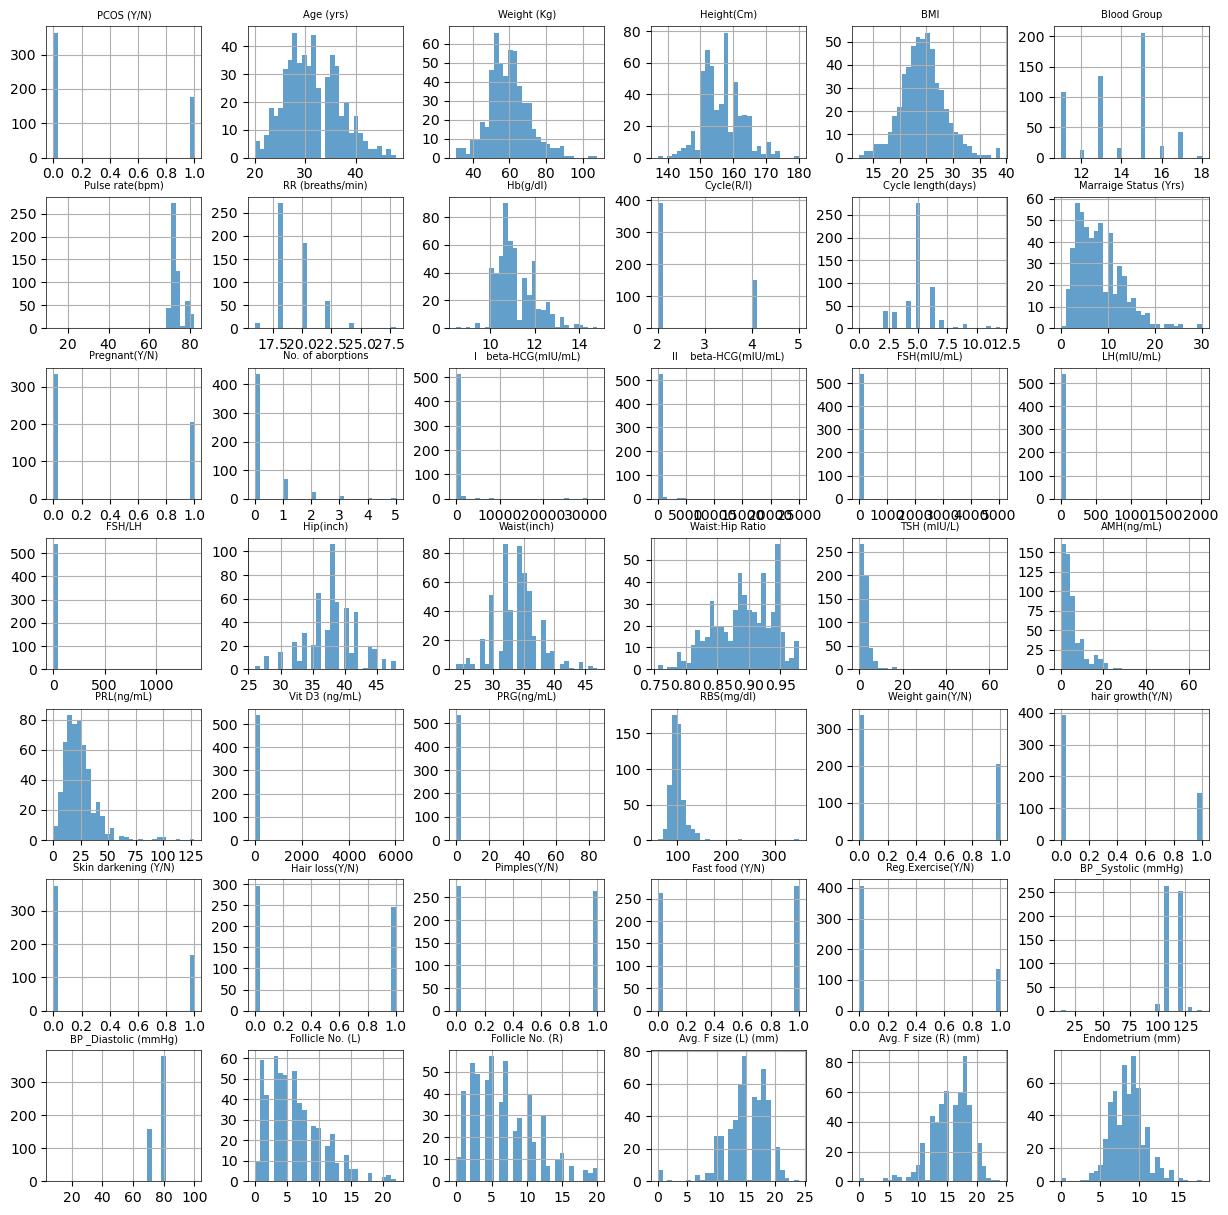

In [33]:
df.hist(figsize=(15,15), bins=30,alpha=0.7, xlabelsize=10, ylabelsize=10);

In [34]:
X = df.drop("PCOS (Y/N)",axis = 1)
y = df["PCOS (Y/N)"]

In [35]:
X.shape

(541, 41)

In [36]:
y.shape

(541,)

# train_test_split

In [37]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=79, shuffle=True) #38

In [38]:
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 289, 1: 143}

In [39]:
smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [40]:
X_resampled.shape

(578, 41)

In [41]:
unique, counts = np.unique(y_resampled, return_counts=True)

dict(zip(unique, counts))

{0: 289, 1: 289}

# Random Forest

In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfecv_rf = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')
#X_rfe = rfecv_rf.fit_transform(X, y)

selector = rfecv_rf.fit(X_resampled, y_resampled)
selected_features_rf = X_resampled.columns[selector.support_]
selected_features_rf

Index(['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')

In [43]:
#creat ids
param_grid ={
    'n_estimators' : [50,100, 150, 200, 250, 300, 350, 400, 450, 500, 1000],
    'max_features' : ['auto','sqrt','log2'],
    'max_depth' : [50,100, 150, 200, 250, 300, 350, 400, 450, 500, 1000],
    'min_samples_split' : [5,10,12,15,20,50,100, 150,200],
    'min_samples_leaf' : [6,8,10,15,20,50,100, 150, 200],
    'criterion':['gini', 'entropy']
}
rf=RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions=param_grid, cv = 5, verbose=2,n_jobs = -1)

rf_random.fit(X_resampled[selected_features_rf], y_resampled)

best_params = rf_random.best_params_
best_params

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 450,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 500,
 'criterion': 'gini'}

In [44]:
# Train the final Random Forest model with the best parameters
final_rf_model = RandomForestClassifier(random_state=42, **best_params)
final_rf_model.fit(X_resampled[selected_features_rf], y_resampled)

# Evaluate the final model
rf_accuracy = final_rf_model.score(X_test[selected_features_rf], y_test)*100
print(f'Test Accuracy: {rf_accuracy}')

Test Accuracy: 95.41284403669725


[[73  2]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.94      0.91      0.93        34

    accuracy                           0.95       109
   macro avg       0.95      0.94      0.95       109
weighted avg       0.95      0.95      0.95       109



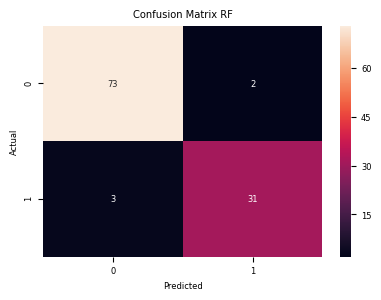

In [45]:
ypredRF = final_rf_model.predict(X_test[selected_features_rf])


plt.figure(figsize=(4.5, 3))
cmRF = confusion_matrix(y_test, ypredRF)
print(cmRF)

sns.heatmap(cmRF, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RF")

print(classification_report(y_test,ypredRF))

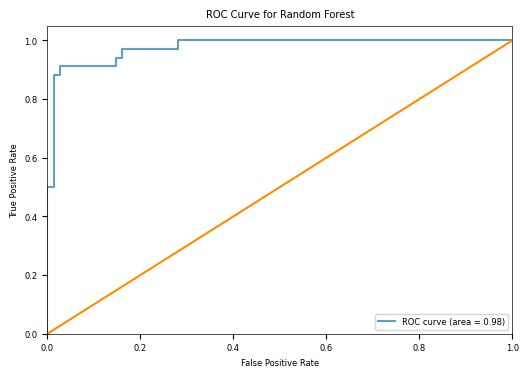

In [46]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, final_rf_model.predict_proba(X_test[selected_features_rf])[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.plot(fpr, tpr, color='#5F9EC9', lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [47]:
pickle.dump(final_rf_model, open('Saved Model/final_rf_model.pkl', 'wb'))

In [48]:
loaded_rf_model = pickle.load(open('Saved Model/final_rf_model.pkl', 'rb'))
loaded_rf_model = loaded_rf_model.score(X_test[selected_features_rf], y_test)*100
print(loaded_rf_model)

95.41284403669725


In [49]:
np.save('Saved Model/X_train.npy', X_resampled[selected_features_rf])
np.save('Saved Model/ytrain.npy', y_resampled)
np.save('Saved Model/X_test.npy', X_test[selected_features_rf])
np.save('Saved Model/ytest.npy', y_test)

# Decision Tree Classifier

In [50]:
dt = DecisionTreeClassifier(random_state=42)
rfecv_dt = RFE(estimator=dt, step=1, n_features_to_select = 20)
#X_rfe = rfecv_rf.fit_transform(X, y)
selector = rfecv_dt.fit(X_resampled, y_resampled)
selected_features_dt = X_resampled.columns[selector.support_]
selected_features_dt

Index(['Age (yrs)', 'Weight (Kg)', 'BMI', 'Hb(g/dl)', 'Cycle(R/I)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'Waist(inch)', 'Waist:Hip Ratio',
       'PRL(ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'hair growth(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')

In [51]:
max_depth = [int(x) for x in np.linspace(start = 500, stop= 10000, num = 10)]
params = {
    'max_depth': max_depth,
    'min_samples_leaf' : [5,10,12,15,20,50,100, 150, 200, 250, 300, 350, 400, 450, 500],
    'criterion': ["gini", "entropy"],
    'splitter' : ['best','random'],
    'min_samples_split' : [5,10,12,15,20,50,100, 150, 200, 250, 300, 350, 400, 450, 500],
}

dt = DecisionTreeClassifier()
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = params,
               n_iter = 200, cv = 5, verbose=2, random_state=35, n_jobs = -1)


dt_random.fit(X_resampled[selected_features_dt], y_resampled)

best_params = dt_random.best_params_
best_params

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'splitter': 'random',
 'min_samples_split': 12,
 'min_samples_leaf': 10,
 'max_depth': 7888,
 'criterion': 'entropy'}

In [52]:
# Train the final DT model with the best parameters
final_dt_model = DecisionTreeClassifier(random_state=42, **best_params)
final_dt_model.fit(X_resampled[selected_features_dt], y_resampled)

# Evaluate the final model
dt_accuracy = final_dt_model.score(X_test[selected_features_dt], y_test)*100
print(f'Test Accuracy DT: {dt_accuracy}')

Test Accuracy DT: 82.56880733944955


[[68  7]
 [12 22]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        75
           1       0.76      0.65      0.70        34

    accuracy                           0.83       109
   macro avg       0.80      0.78      0.79       109
weighted avg       0.82      0.83      0.82       109



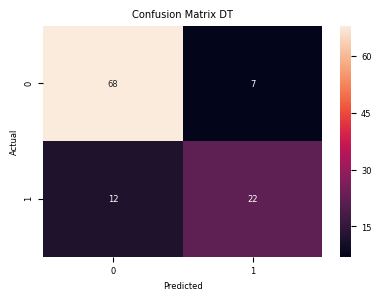

In [53]:
ypredDT = final_dt_model.predict(X_test[selected_features_dt])

plt.figure(figsize=(4.5, 3))
cmDT = confusion_matrix(y_test, ypredDT)
print(cmDT)

sns.heatmap(cmDT, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix DT")

print(classification_report(y_test,ypredDT))

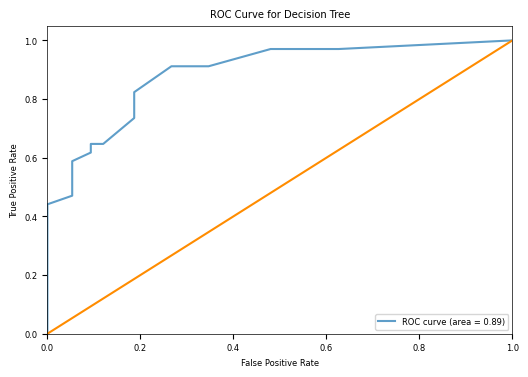

In [54]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, final_dt_model.predict_proba(X_test[selected_features_dt])[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.plot(fpr, tpr, color='#5F9EC9', lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [55]:
## DT
pickle.dump(final_dt_model, open('Saved Model/final_dt_model.pkl', 'wb'))


loaded_dt_model = pickle.load(open('Saved Model/final_dt_model.pkl', 'rb'))
loaded_dt_model = loaded_dt_model.score(X_test[selected_features_dt], y_test)
print(loaded_dt_model)

0.8256880733944955


# SVC

In [56]:
svm = SVC(kernel='linear')
rfecv_svc = RFECV(estimator=svm, step=1, cv=5, scoring='accuracy')
#X_rfe = rfecv_rf.fit_transform(X, y)

selector = rfecv_svc.fit(X_resampled, y_resampled)
selected_features_svm = X_resampled.columns[selector.support_]
selected_features_svm

Index(['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')

In [57]:
from scipy import stats
from scipy.stats import randint

param_grid= param_grid= {
            "C": stats.uniform(2, 10),
            "gamma": stats.uniform(0.1, 1),
            "kernel": ['rbf', 'linear', 'poly'], 
            "class_weight" :['balanced', None]
}

svm = SVC()
svm_random = RandomizedSearchCV(estimator = svm, param_distributions = param_grid, n_iter = 100, n_jobs = 4, cv = 3, random_state = 100)
svm_random.fit(X_resampled[selected_features_svm], y_resampled)

best_params = svm_random.best_params_
best_params

{'C': 2.013990231190438,
 'class_weight': 'balanced',
 'gamma': 0.8204583621931595,
 'kernel': 'linear'}

In [58]:
final_svm_model = SVC(**best_params, probability=True)

final_svm_model.fit(X_resampled[selected_features_svm], y_resampled)

# Evaluate the final model
svm_accuracy = final_svm_model.score(X_test[selected_features_svm], y_test)*100
print(f'Test Accuracy SVM: {svm_accuracy}')

Test Accuracy SVM: 83.4862385321101


[[65 10]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        75
           1       0.72      0.76      0.74        34

    accuracy                           0.83       109
   macro avg       0.81      0.82      0.81       109
weighted avg       0.84      0.83      0.84       109



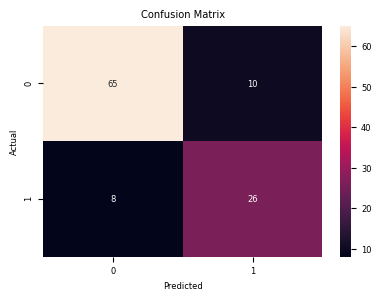

In [59]:
ypredSVM = final_svm_model.predict(X_test[selected_features_svm])

plt.figure(figsize=(4.5, 3))
cmSVM = confusion_matrix(y_test, ypredSVM)
print(cmSVM)

sns.heatmap(cmSVM, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

print(classification_report(y_test,ypredSVM))

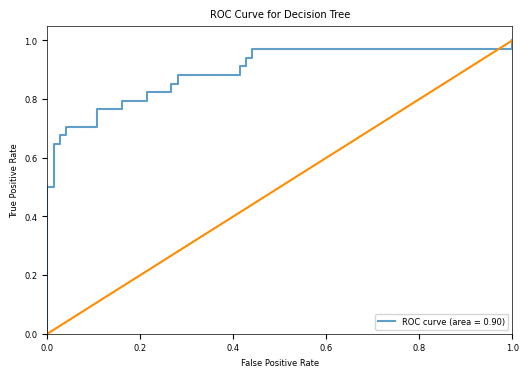

In [60]:
fpr, tpr, _ = roc_curve(y_test, final_svm_model.predict_proba(X_test[selected_features_svm])[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.plot(fpr, tpr, color='#5F9EC9', lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [61]:
## SVM
pickle.dump(final_svm_model, open('Saved Model/final_svm_model.pkl', 'wb'))


loaded_svm_model = pickle.load(open('Saved Model/final_svm_model.pkl', 'rb'))
loaded_svm_model = loaded_svm_model.score(X_test[selected_features_svm], y_test)
print(loaded_svm_model)

0.8348623853211009


# XGBClassifier

In [62]:
xgb = XGBClassifier()
rfecv_xgb = RFECV(estimator=xgb, step=1, cv=5, scoring='accuracy')
#X_rfe = rfecv_rf.fit_transform(X, y)
selector = rfecv_xgb.fit(X_resampled, y_resampled)
selected_features_xgb = X_resampled.columns[selector.support_]
selected_features_xgb

Index(['Age (yrs)', 'Weight (Kg)', 'BMI', 'Blood Group', 'RR (breaths/min)',
       'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'AMH(ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [63]:
param_grid_xg = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [int(x) for x in np.linspace(start = 200, stop= 10000, num = 25)]
}

xgb = XGBClassifier()

xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions = param_grid_xg, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)

xgb_random.fit(X_resampled[selected_features_xgb], y_resampled)

best_parameters = xgb_random.best_params_
best_parameters

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [11:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


{'subsample': 1.0,
 'silent': False,
 'reg_lambda': 0.1,
 'n_estimators': 5100,
 'min_child_weight': 0.5,
 'max_depth': 20,
 'learning_rate': 0.1,
 'gamma': 0.5,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 1.0}

In [64]:
final_xgb_model = XGBClassifier(**best_parameters)

final_xgb_model.fit(X_resampled[selected_features_xgb], y_resampled)

# Evaluate the final model
xgb_accuracy = final_xgb_model.score(X_test[selected_features_xgb], y_test)*100
print(f'Test Accuracy XGB: {xgb_accuracy}')

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [11:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy XGB: 91.74311926605505


[[70  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.86      0.88      0.87        34

    accuracy                           0.92       109
   macro avg       0.90      0.91      0.90       109
weighted avg       0.92      0.92      0.92       109



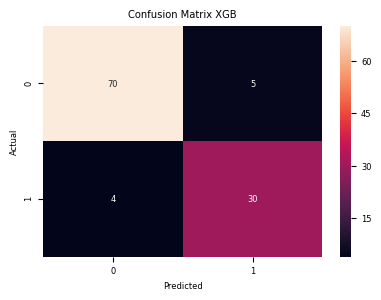

In [65]:
ypredXGB = final_xgb_model.predict(X_test[selected_features_xgb])

plt.figure(figsize=(4.5, 3))
cmXGB = confusion_matrix(y_test, ypredXGB)
print(cmXGB)

sns.heatmap(cmXGB, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix XGB")

print(classification_report(y_test,ypredXGB))

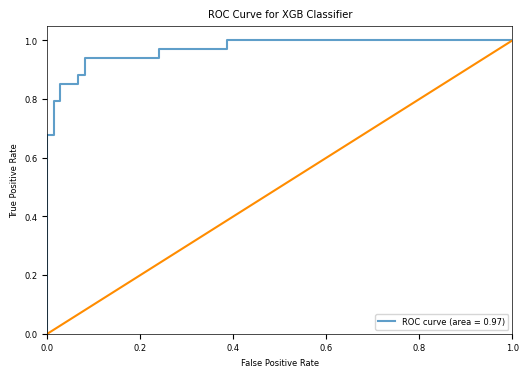

In [66]:
fpr, tpr, _ = roc_curve(y_test, final_xgb_model.predict_proba(X_test[selected_features_xgb])[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.plot(fpr, tpr, color='#5F9EC9', lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGB Classifier')
plt.legend(loc="lower right")
plt.show()

In [67]:
## XGB
pickle.dump(final_xgb_model, open('Saved Model/final_xgb_model.pkl', 'wb'))


loaded_xgb_model = pickle.load(open('Saved Model/final_xgb_model.pkl', 'rb'))
loaded_xgb_model = loaded_xgb_model.score(X_test[selected_features_xgb], y_test)
print(loaded_xgb_model)

0.9174311926605505


# Logistic Regression

In [68]:
lor = LogisticRegression()
rfecv_lor = RFECV(estimator=lor, step=1, cv=5, scoring='accuracy')
#X_rfe = rfecv_rf.fit_transform(X, y)
selector = rfecv_lor.fit(X_resampled, y_resampled)
selected_features_lor = X_resampled.columns[selector.support_]
selected_features_lor

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Index(['Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Pregnant(Y/N)',
       'No. of aborptions', 'PRG(ng/mL)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Endometrium (mm)'],
      dtype='object')

In [69]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'tol':[0.01, 0.001, 0.0001, 0.00001],
    'penalty': ['l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

lor = LogisticRegression()
lor_random = RandomizedSearchCV(estimator=lor, param_distributions = param_grid, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)

lor_random.fit(X_resampled[selected_features_lor], y_resampled)

best_params = lor_random.best_params_
best_params

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'tol': 0.0001,
 'solver': 'newton-cg',
 'penalty': 'l2',
 'max_iter': 500,
 'C': 10}

In [70]:
final_lor_model = LogisticRegression(**best_params)

final_lor_model.fit(X_resampled[selected_features_lor], y_resampled)

# Evaluate the final model
lor_accuracy = final_lor_model.score(X_test[selected_features_lor], y_test)*100
print(f'Test Accuracy LOR: {lor_accuracy}')

Test Accuracy LOR: 88.07339449541286


[[67  8]
 [ 5 29]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        75
           1       0.78      0.85      0.82        34

    accuracy                           0.88       109
   macro avg       0.86      0.87      0.86       109
weighted avg       0.88      0.88      0.88       109



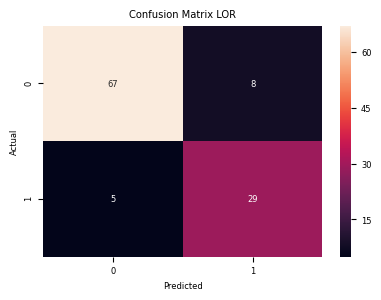

In [71]:
ypredLOR = final_lor_model.predict(X_test[selected_features_lor])

plt.figure(figsize=(4.5, 3))
cmLOR = confusion_matrix(y_test, ypredLOR)
print(cmLOR)

sns.heatmap(cmLOR, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix LOR")

print(classification_report(y_test,ypredLOR))

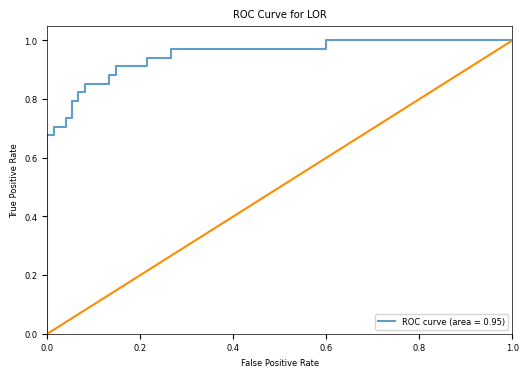

In [72]:
fpr, tpr, _ = roc_curve(y_test, final_lor_model.predict_proba(X_test[selected_features_lor])[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.plot(fpr, tpr, color='#5F9EC9', lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LOR')
plt.legend(loc="lower right")
plt.show()

In [73]:
## LOR
pickle.dump(final_lor_model, open('Saved Model/final_lor_model.pkl', 'wb'))


loaded_lor_model = pickle.load(open('Saved Model/final_lor_model.pkl', 'rb'))
loaded_lor_model = loaded_lor_model.score(X_test[selected_features_lor], y_test)
print(loaded_lor_model)

0.8807339449541285


# AdaBoostClassifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()
rfecv_adb = RFECV(estimator=adb, step=1, cv=5, scoring='accuracy')
#X_rfe = rfecv_rf.fit_transform(X, y)
selector = rfecv_adb.fit(X_resampled, y_resampled)
selected_features_adb = X_resampled.columns[selector.support_]
selected_features_adb

Index(['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Waist(inch)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

In [75]:
ADB_grid = {
    'n_estimators':[int(x) for x in np.linspace(start = 50, stop= 100, num = 25)],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'algorithm':['SAMME.R', 'SAMME'],
}

adb = AdaBoostClassifier()
adb_random = RandomizedSearchCV(estimator=adb, param_distributions = ADB_grid, n_iter = 25, scoring = 'accuracy', error_score = 0, cv = 3, verbose = 3, n_jobs = -1)

adb_random.fit(X_resampled[selected_features_adb], y_resampled)

best_params = adb_random.best_params_
best_params

Fitting 3 folds for each of 25 candidates, totalling 75 fits


{'n_estimators': 93, 'learning_rate': 0.3, 'algorithm': 'SAMME.R'}

In [76]:
final_adb_model = AdaBoostClassifier(**best_params)

final_adb_model.fit(X_resampled[selected_features_adb], y_resampled)

# Evaluate the final model
adb_accuracy = final_adb_model.score(X_test[selected_features_adb], y_test)*100
print(f'Test Accuracy ADB: {adb_accuracy}')

Test Accuracy ADB: 88.07339449541286


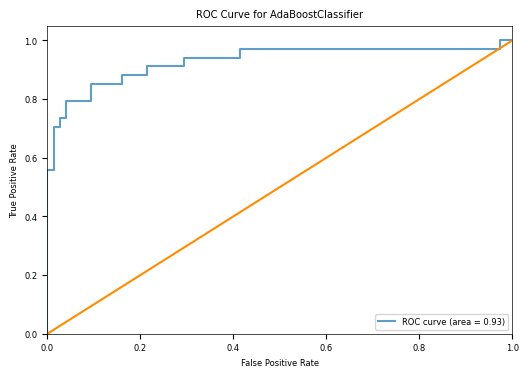

In [77]:
fpr, tpr, _ = roc_curve(y_test, final_adb_model.predict_proba(X_test[selected_features_adb])[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.plot(fpr, tpr, color='#5F9EC9', lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoostClassifier')
plt.legend(loc="lower right")
plt.show()

[[69  6]
 [ 7 27]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        75
           1       0.82      0.79      0.81        34

    accuracy                           0.88       109
   macro avg       0.86      0.86      0.86       109
weighted avg       0.88      0.88      0.88       109



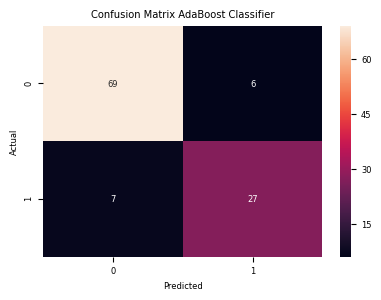

In [78]:
ypredADB = final_adb_model.predict(X_test[selected_features_adb])

plt.figure(figsize=(4.5, 3))
cmADB = confusion_matrix(y_test, ypredADB)
print(cmADB)

sns.heatmap(cmADB, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix AdaBoost Classifier")

print(classification_report(y_test,ypredADB))

In [79]:
#AdaBoost Classifier
pickle.dump(final_adb_model, open('Saved Model/final_adb_model.pkl', 'wb'))

In [80]:
loaded_adb_model = pickle.load(open('Saved Model/final_adb_model.pkl', 'rb'))
loaded_adb_model = loaded_adb_model.score(X_test[selected_features_adb], y_test)
print(loaded_adb_model)

0.8807339449541285


# Voting ensemble machine learning

In [81]:
from sklearn.ensemble import VotingClassifier 

In [86]:
# Voting Classifier with hard voting 
voting = VotingClassifier(estimators = [
    ('random forest', final_rf_model),
    ('XGBoost', final_xgb_model),
], voting ='hard') 
voting.fit(X_resampled, y_resampled) 
y_pred = voting.predict(X_test)
y_pred

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:160: UserWarning: [11:34:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [87]:
voting_accuracy = voting.score(X_test, y_test)*100
print(f'Test Accuracy Voting: {voting_accuracy}')

Test Accuracy Voting: 95.41284403669725


In [ ]:
fpr, tpr, _ = roc_curve(y_test, voting.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.plot(fpr, tpr, color='#5F9EC9', lw=1.5, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkorange', lw=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoostClassifier')
plt.legend(loc="lower right")
plt.show()

In [98]:
from sklearn.metrics import log_loss

maeRF = mean_absolute_error(y_test, ypredRF)
RmseRF = np.sqrt(metrics.mean_squared_error(y_test, ypredRF))
logloss = log_loss(y_test, ypredRF)

print("MAE of Random Forest on test set: {:.3f}".format(maeRF))
print("Root MSE of Random Forest on test set: {:.3f}".format(RmseRF))
print("Logloss of Random Forest: {:.3f}".format(logloss))

MAE of Random Forest on test set: 0.046
Root MSE of Random Forest on test set: 0.214
Logloss of Random Forest: 1.584


In [99]:
maeDT = mean_absolute_error(y_test, ypredDT)
RmseDT = np.sqrt(metrics.mean_squared_error(y_test, ypredDT))
loglossDT = log_loss(y_test, ypredDT)

print("MAE of DT on test set: {:.3f}".format(maeDT))
print("Root MSE of DT on test set: {:.3f}".format(RmseDT))
print("Logloss of DT: {:.3f}".format(loglossDT))

MAE of DT on test set: 0.174
Root MSE of DT on test set: 0.418
Logloss of DT: 6.021


In [100]:
maeSVM = mean_absolute_error(y_test, ypredSVM)
RmseSVM = np.sqrt(metrics.mean_squared_error(y_test, ypredSVM))
loglossSVM = log_loss(y_test, ypredSVM)

print("MAE of SVM on test set: {:.3f}".format(maeSVM))
print("Root MSE of SVM on test set: {:.3f}".format(RmseSVM))
print("Logloss of SVM: {:.3f}".format(loglossSVM))

MAE of SVM on test set: 0.165
Root MSE of SVM on test set: 0.406
Logloss of SVM: 5.704


In [101]:
maeLOR = mean_absolute_error(y_test, ypredLOR)
RmseLOR = np.sqrt(metrics.mean_squared_error(y_test, ypredLOR))
loglossLOR = log_loss(y_test, ypredLOR)

print("MAE of LOR on test set: {:.3f}".format(maeLOR))
print("Root MSE of LOR on test set: {:.3f}".format(RmseLOR))
print("Logloss of LOR: {:.3f}".format(loglossLOR))

MAE of LOR on test set: 0.119
Root MSE of LOR on test set: 0.345
Logloss of LOR: 4.119


In [102]:
maeXGB = mean_absolute_error(y_test, ypredXGB)
RmseXGB = np.sqrt(metrics.mean_squared_error(y_test, ypredXGB))
loglossXGB = log_loss(y_test, ypredXGB)

print("MAE of XGB on test set: {:.3f}".format(maeXGB))
print("Root MSE of XGB on test set: {:.3f}".format(RmseXGB))
print("Logloss of XGB: {:.3f}".format(loglossXGB))

MAE of XGB on test set: 0.083
Root MSE of XGB on test set: 0.287
Logloss of XGB: 2.852


In [103]:
maeADB = mean_absolute_error(y_test, ypredADB)
RmseADB = np.sqrt(metrics.mean_squared_error(y_test, ypredADB))
loglossADB = log_loss(y_test, ypredADB)

print("MAE of ADB on test set: {:.3f}".format(maeADB))
print("Root MSE of ADB on test set: {:.3f}".format(RmseADB))
print("Logloss of ADB: {:.3f}".format(loglossADB))

MAE of ADB on test set: 0.119
Root MSE of ADB on test set: 0.345
Logloss of ADB: 4.119


In [118]:
Performances = {'Accuracy (%)': [round(rf_accuracy, 2), round(dt_accuracy, 2), round(svm_accuracy, 2), round(xgb_accuracy, 2), 
                                 round(lor_accuracy, 2), round(adb_accuracy, 2)],
                
                'Precision (%)': [95, 82, 84, 92, 88, 88],
                'Recall (%)': [95, 83, 83, 92, 88, 88],
                'F1-Score (%)': [95, 82, 84, 92, 88, 88],
                'ROC': [0.98, 0.89, 0.90, 0.97, 0.95, 0.93],
                
                'MAE': [round(maeRF, 2), round(maeDT, 2), round(maeSVM, 2), round(maeXGB, 2), round(maeLOR, 2), 
                        round(maeADB, 2)],
                'RMSE': [round(RmseRF, 2),round(RmseDT, 2),round(RmseSVM, 2),round(RmseXGB, 2),round(RmseLOR, 2),
                         round(RmseADB, 2)],
                'Log Loss': [round(logloss, 2), round(loglossDT, 2), round(loglossSVM, 2), round(loglossXGB, 2), 
                             round(loglossLOR, 2), round(loglossADB, 2)]
       }  
new = pd.DataFrame(Performances, index=['Random Forest', 'Decision Tree', 'Support Vector Machine', 'XGBoost', 
                                        'Logistic Regression', 'ADABoost']) 
new

,Accuracy (%),Precision (%),Recall (%),F1-Score (%),ROC,MAE,RMSE,Log Loss
Random Forest,95.41,95,95,95,0.98,0.05,0.21,1.58
Decision Tree,82.57,82,83,82,0.89,0.17,0.42,6.02
Support Vector Machine,83.49,84,83,84,0.90,0.17,0.41,5.70
XGBoost,91.74,92,92,92,0.97,0.08,0.29,2.85
Logistic Regression,88.07,88,88,88,0.95,0.12,0.35,4.12
ADABoost,88.07,88,88,88,0.93,0.12,0.35,4.12
